In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.cross_validation import train_test_split


from sklearn.linear_model import LinearRegression

/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Challenge 1

In [4]:
#set variables
B0 = 3
B1 = 0.5
X = np.logspace(0, 10, num=1000)
epsilon = np.random.normal(0,.5, size=1000)
y=B0 + B1*np.log(X)+epsilon

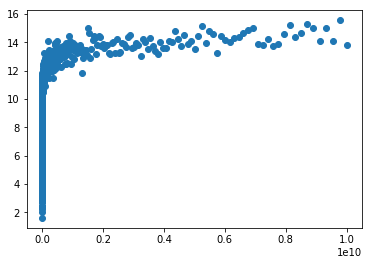

In [5]:
plt.scatter(X, y)

In [6]:
X_sq = X**2

In [7]:
X = X.reshape(-1,1)

In [8]:
df = pd.DataFrame(X, X_sq)

In [9]:
df.reset_index(inplace=True)

In [10]:
df.head()

,index,0
0,1.000000,1.000000
1,1.047177,1.023317
2,1.096579,1.047177
3,1.148312,1.071593
4,1.202486,1.096579


In [11]:
quad_model = LinearRegression()
quad_model.fit(df,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
quad_pred = quad_model.predict(df)

In [13]:
quad_model.score(df, y)

0.33490130320368172

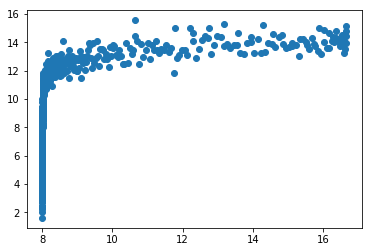

In [14]:
plt.scatter(quad_pred, y)

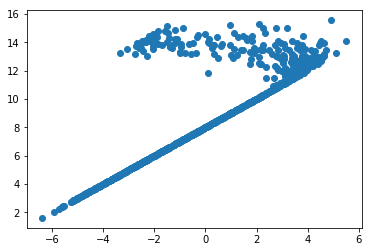

In [15]:
plt.scatter(y-quad_pred, y)

In [16]:
#logarithmic fit:
X_log = np.log(X)
df = pd.DataFrame(X, X_log)

In [17]:
df.reset_index(inplace=True)

In [18]:
log_model = LinearRegression()
log_model.fit(df,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
log_pred = log_model.predict(df)

In [20]:
log_model.score(df, y)

0.9769701020269318

In [21]:
mean_squared_error(log_pred, y)

NameError: name 'mean_squared_error' is not defined

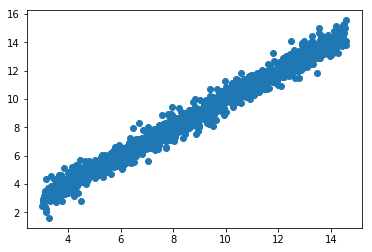

In [22]:
plt.scatter(log_pred, y)

# Challenge 2

In [23]:
#set variables
B0 = 3
B1 = 0.5
B2 = 1.2
X = np.linspace(0, 1000, num=1000)
epsilon = np.random.normal(0,100000, size=1000)
#epsilon = np.random.normal(0,100, size=1000)

y = B0 + B1*X + B2*X**2+epsilon

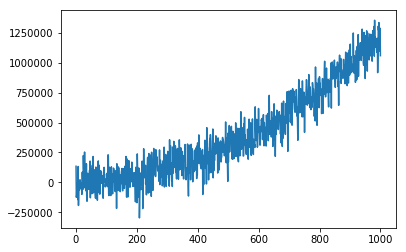

In [24]:
plt.plot(X, y)

In [25]:
X = X.reshape(-1, 1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [27]:
from sklearn.pipeline import make_pipeline
est = make_pipeline(PolynomialFeatures(2), LinearRegression())
est.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [28]:
pred_ = est.predict(X_train)

In [29]:
est.score(X_train, y_train)

0.92528761043000574

In [30]:
est.score(X_test, y_test)

0.93026419715208064

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
mean_squared_error(y_train, pred_)

10057725400.009331

In [33]:
pred_test = est.predict(X_test)

In [34]:
mean_squared_error(y_test, pred_test)

10142806935.075989

# Challenge 3

In [35]:
import statsmodels.api as sm

/Users/bekcunning/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [36]:
powers = range(0,8)
r2 = []
mean_sq_test = []
mean_sq_train = []
aic = []
for p in powers:
    model = make_pipeline(PolynomialFeatures(p), LinearRegression())
    model.fit(X_train, y_train)
    poly = PolynomialFeatures(p)
    X_p = poly.fit_transform(X_train)

    pred_ = model.predict(X_train)
    pred_y = model.predict(X_test)
    mean_sq_train.append(mean_squared_error(y_train, pred_))
    mean_sq_test.append(mean_squared_error(y_test, pred_y))
    r2.append(model.score(X_test, y_test))  
    sm_model = sm.OLS(y_train, X_p)
    results = sm_model.fit()
    aic.append(results.aic)

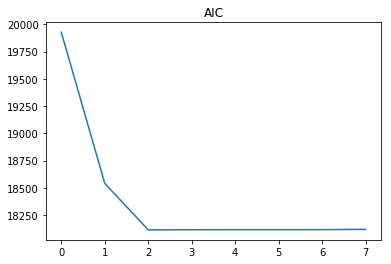

In [37]:
plt.title("AIC")
plt.plot(powers, aic);

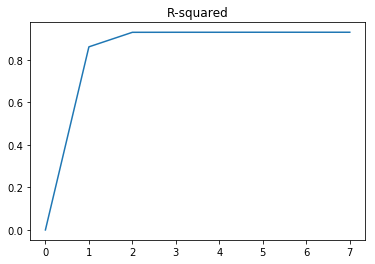

In [38]:
plt.title("R-squared")
plt.plot(powers, r2);

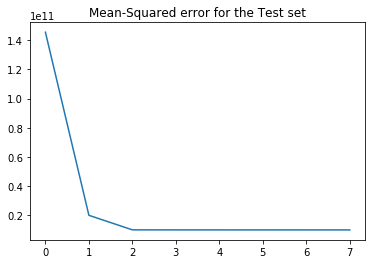

In [39]:
plt.title("Mean-Squared error for the Test set")
plt.plot(powers, mean_sq_test);

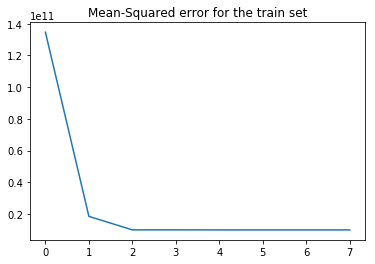

In [40]:
plt.title("Mean-Squared error for the train set")
plt.plot(powers, mean_sq_train);

# Challenge 4

In [41]:
mean_sq_test = []
mean_sq_train = []
n = 1000
m = 5
while m <= n:
    inc_X = X_train[0:m]
    inc_y = y_train[0:m]
    inc_X_test = X_test[0:m]
    inc_y_test = y_test[0:m]
    est = make_pipeline(PolynomialFeatures(2), LinearRegression())
    est.fit(inc_X, inc_y)
    pred_y = est.predict(inc_X)
    pred_y_test = est.predict(inc_X_test)
    mean_sq_train.append(mean_squared_error(inc_y, pred_y))
    mean_sq_test.append(mean_squared_error(inc_y_test, pred_y_test))
    m = m+5

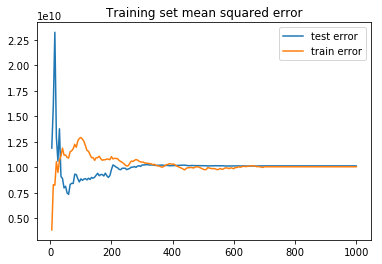

In [42]:

plt.title("Training set mean squared error")
plt.plot(range(5,m, 5), mean_sq_test);
plt.plot(range(5,m, 5), mean_sq_train);
plt.legend(('test error', 'train error'))